<a href="https://colab.research.google.com/github/aprizal543/aprizal543-Machine_Learning_Klasifikasi_Prediksi-Berlangganan-Deposito-Bank/blob/main/Prediksi_Berlangganan_Deposito_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import semua Library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

In [7]:
# Membaca dataset dan menampil informasi dataset
train = pd.read_csv("training_dataset.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [9]:
# Menampilan Stratistik Deskkriptif Dataset
train.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000
mean,550930.993193,40.016233,2.561878,962.210377,0.170143,0.077915,93.576541,-40.485717,3.617890,5166.773124,0.114069
std,259909.889175,10.438059,2.794178,187.566774,0.490611,1.576176,0.580586,4.641091,1.737591,72.479698,0.317902
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325755.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553139.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,777157.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
# Cek missing values
print("\nMissing Values per Fitur: ")
print(train.isnull().sum())


Missing Values per Fitur: 
customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64


Dalam dataset ini tidak terdapat missing value pada setiap variabel

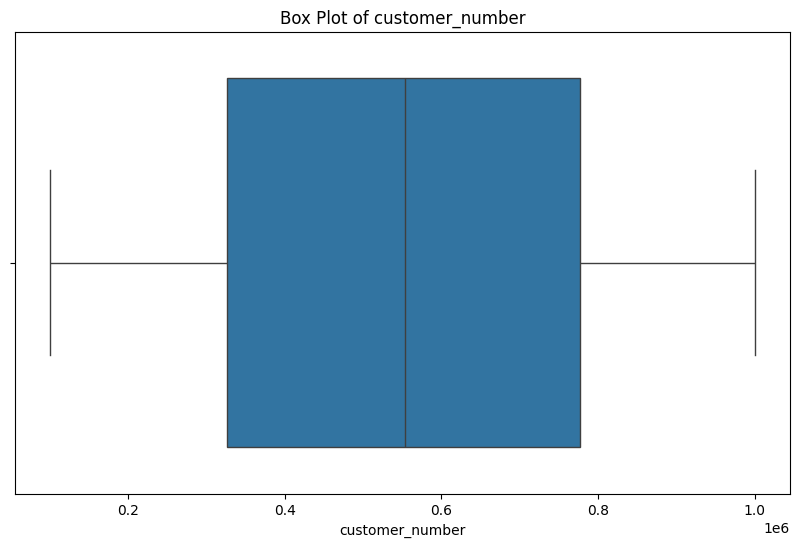

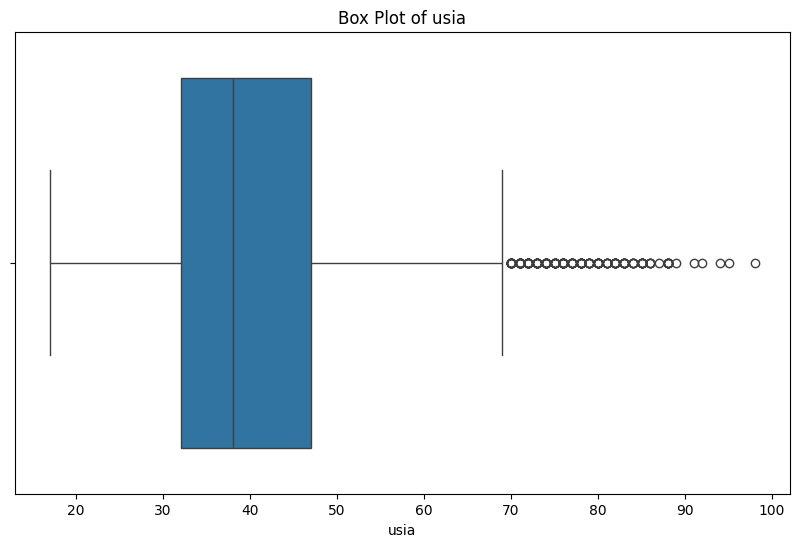

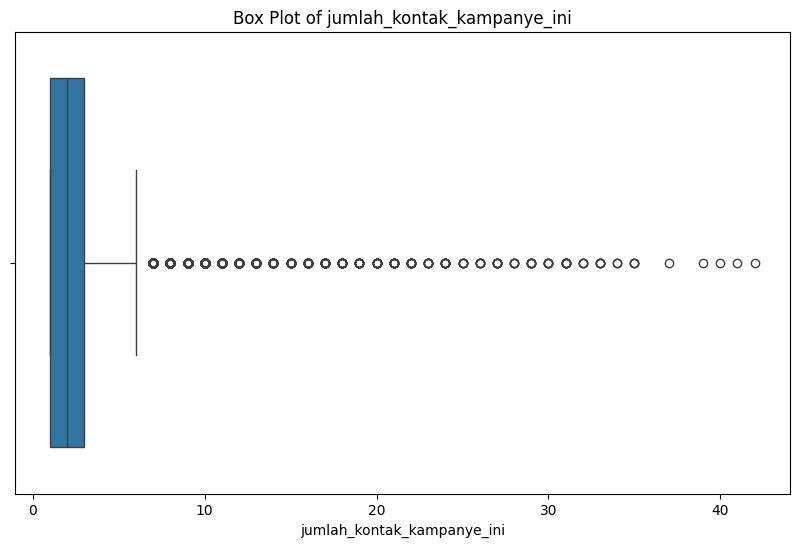

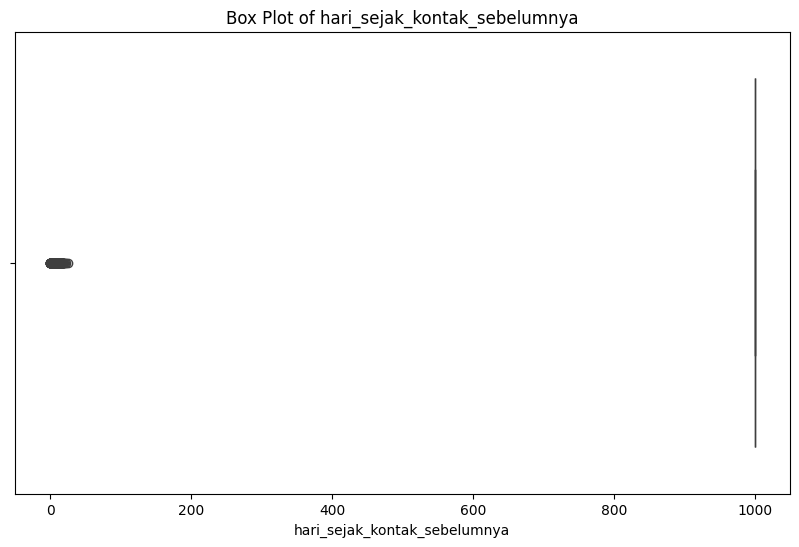

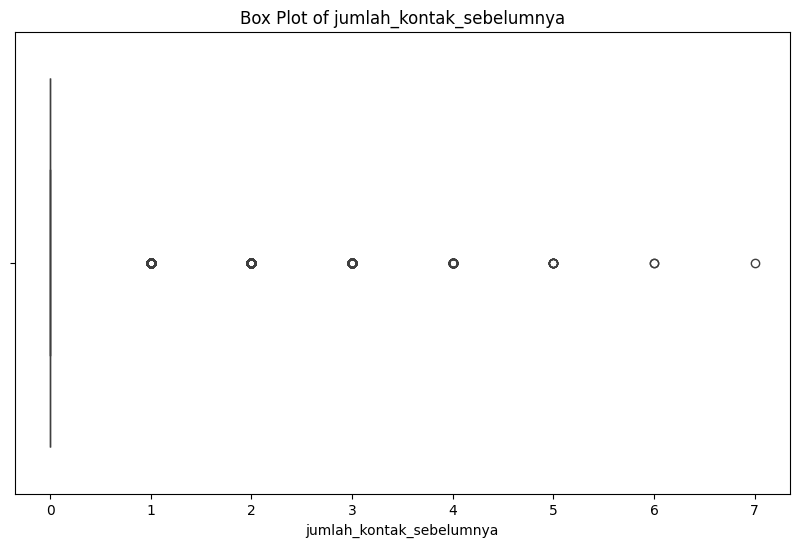

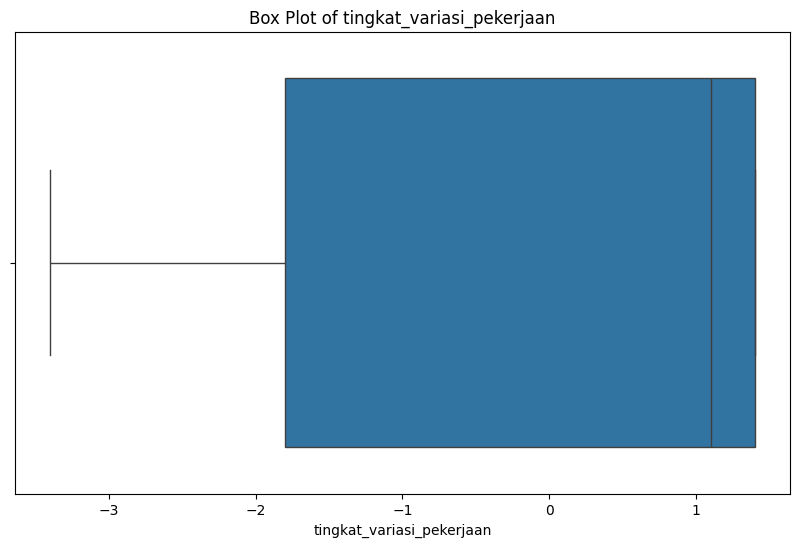

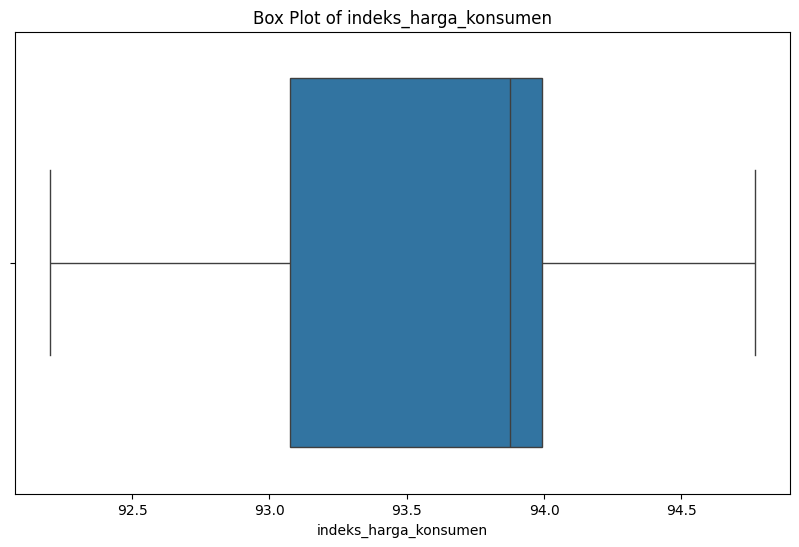

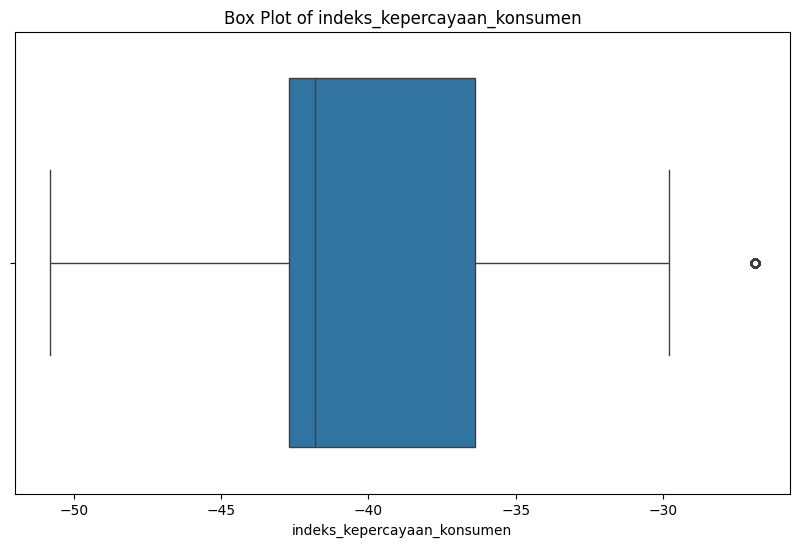

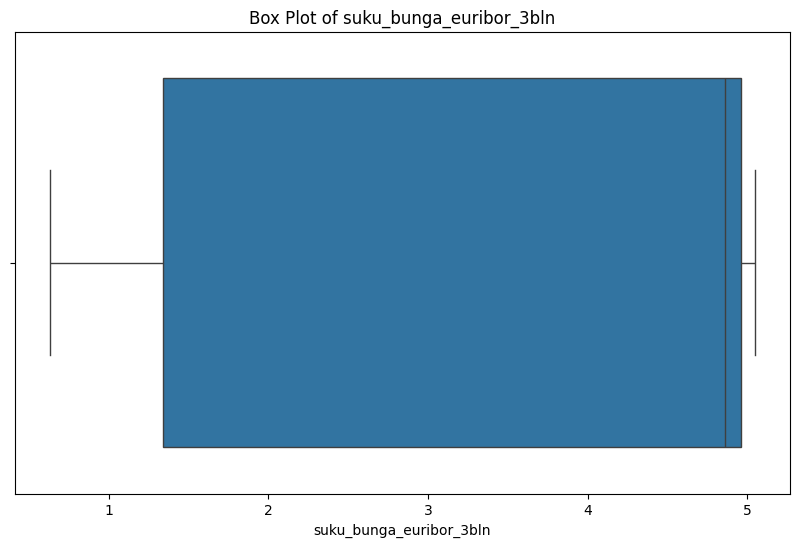

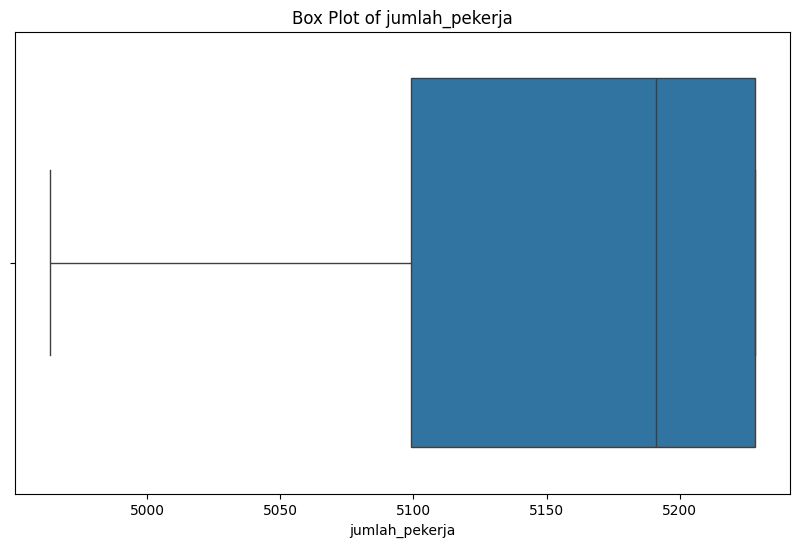

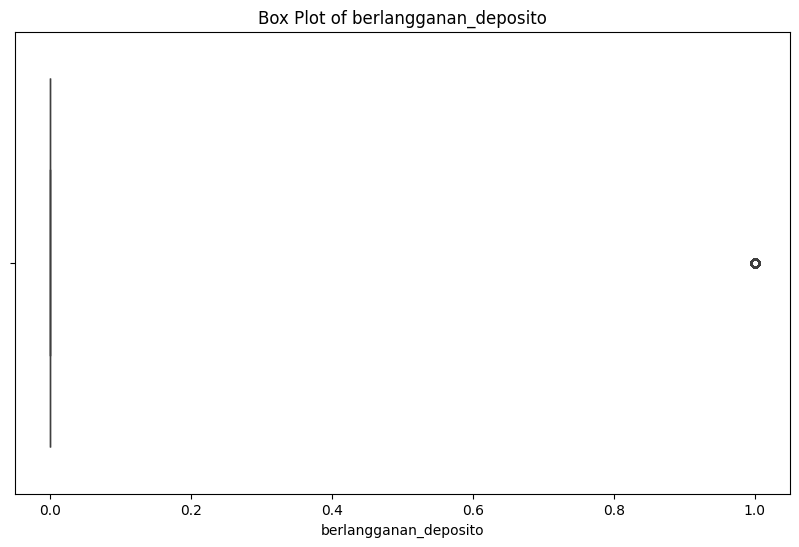

In [5]:
# Mmeriksa apakah ada outlier pada datset
# Pilih hanya kolom numerik untuk box plot
numeric_features_train = train.select_dtypes(include=['number']).columns

for feature in numeric_features_train:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=(train[feature]))
    plt.title(f'Box Plot of {feature}')
    plt.show()

Selanjutnya, menghapus kolom tidak relevan untuk analisis lebih lanjut,'customer_number', pinjaman_rumah', pinjaman_pribadi', 'pulau

In [11]:
# Hapus Kolom 'pinjaman_rumah','pinjaman_pribadi', 'pulau'
train = train.drop(columns=['pulau','customer_number'])

# Tmapilkan DataFrame untuk memastikan kolom telah dihapus
train.head()

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
0,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,1
1,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
3,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,1
4,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [7]:
train

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
0,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,1
1,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
3,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,1
4,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,0
22912,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,2,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,0
22913,29,manajer,lajang,SMA,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
22914,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,mon,2,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0


## EXploratory Data Analysis (EDA)

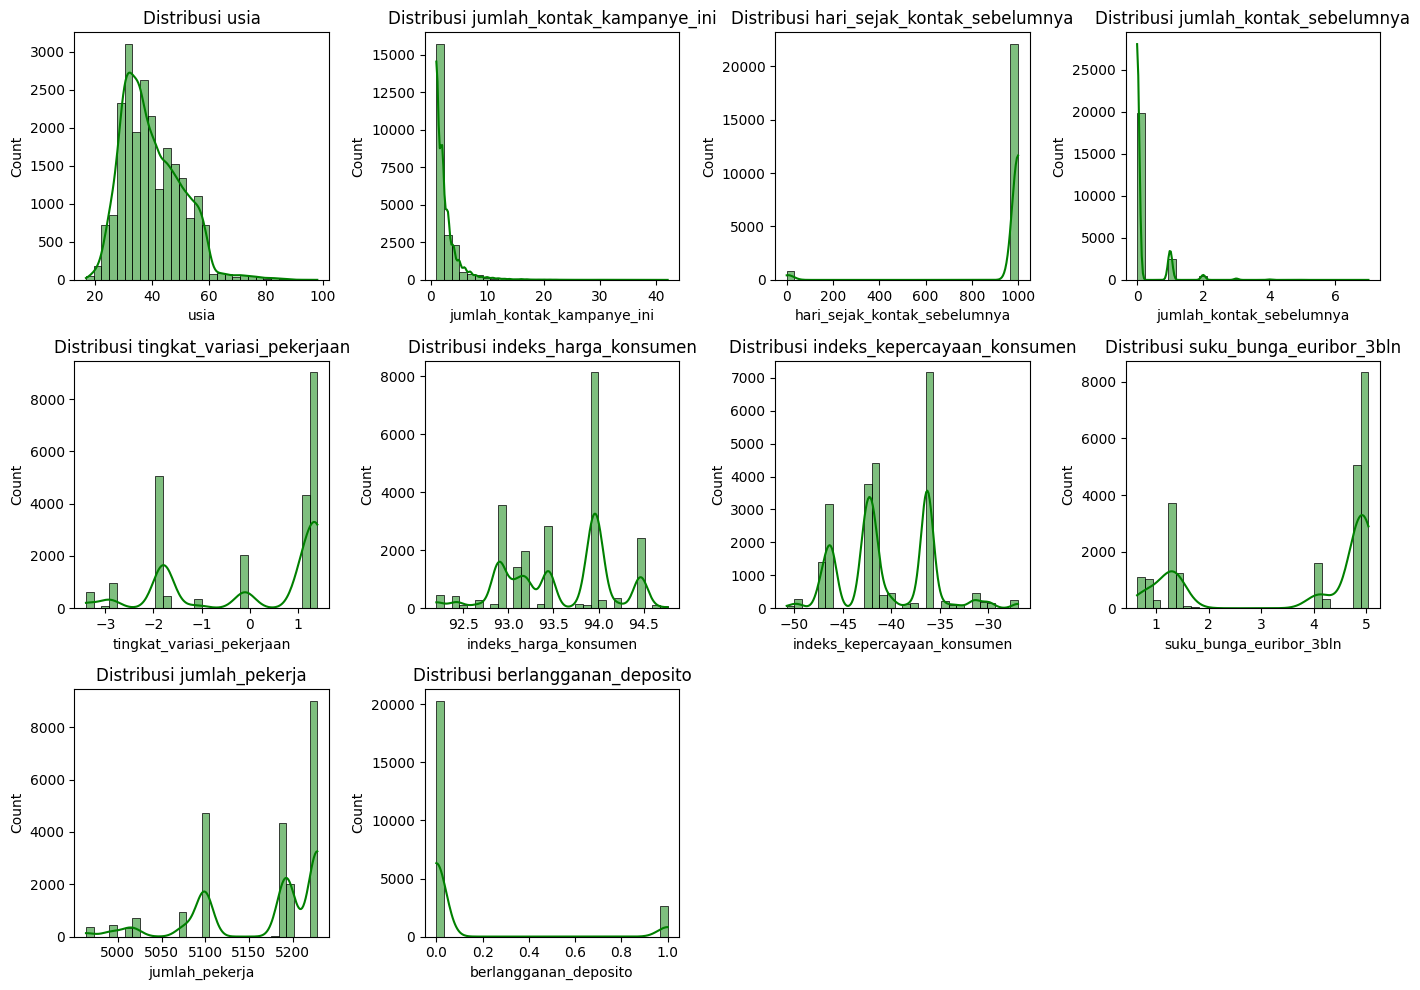

In [13]:
# Ditribusi fitur numerik
num_features = train.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[column], bins=30, kde=True, color='green')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-14-22cb6d4dc343>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
<ipython-input-14-22cb6d4dc343>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
<ipython-input-14-22cb6d4dc343>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
<ipython-input-14-22cb6d4dc343>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=F

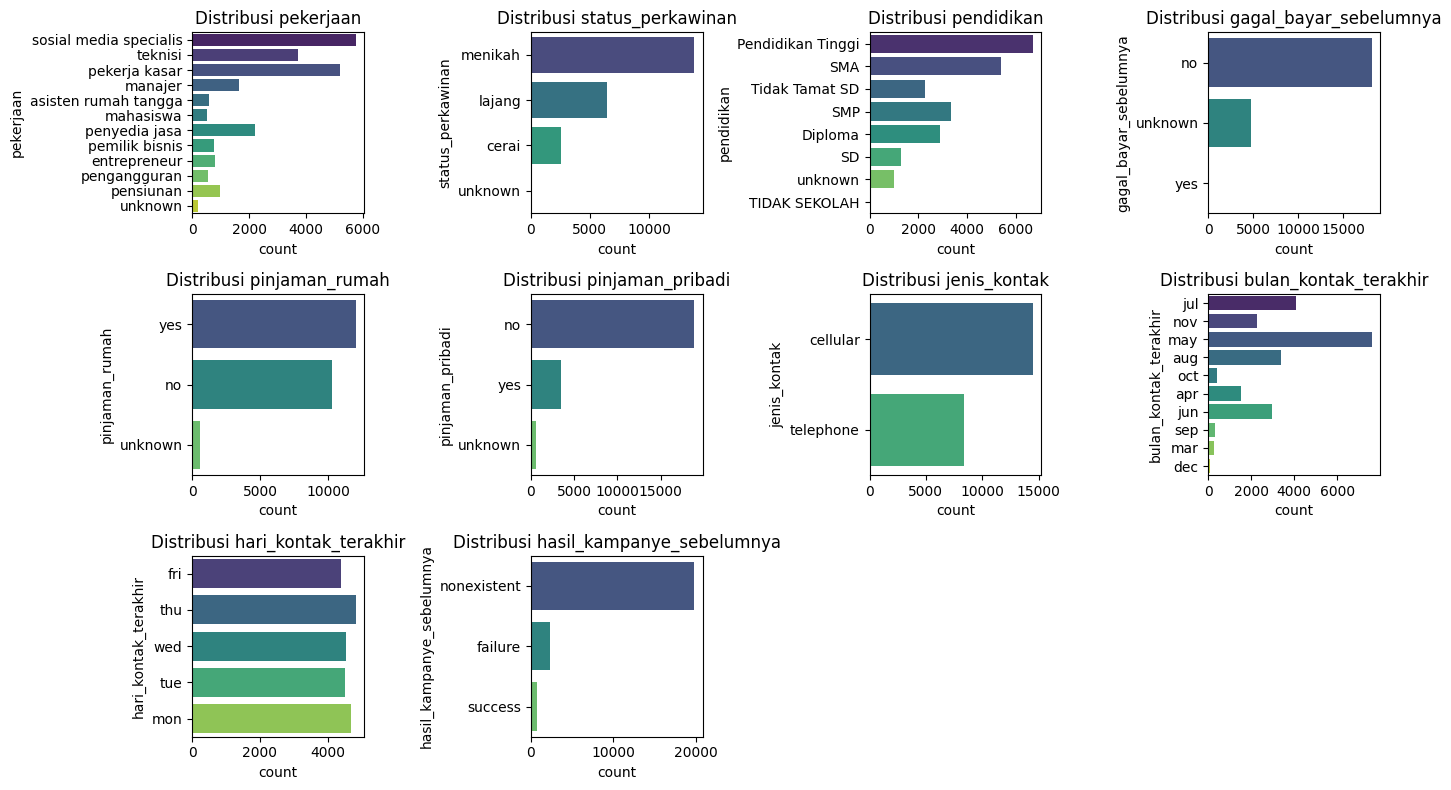

In [14]:
# Distribusi fitur kategorikal
cat_features = train.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(y=train[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

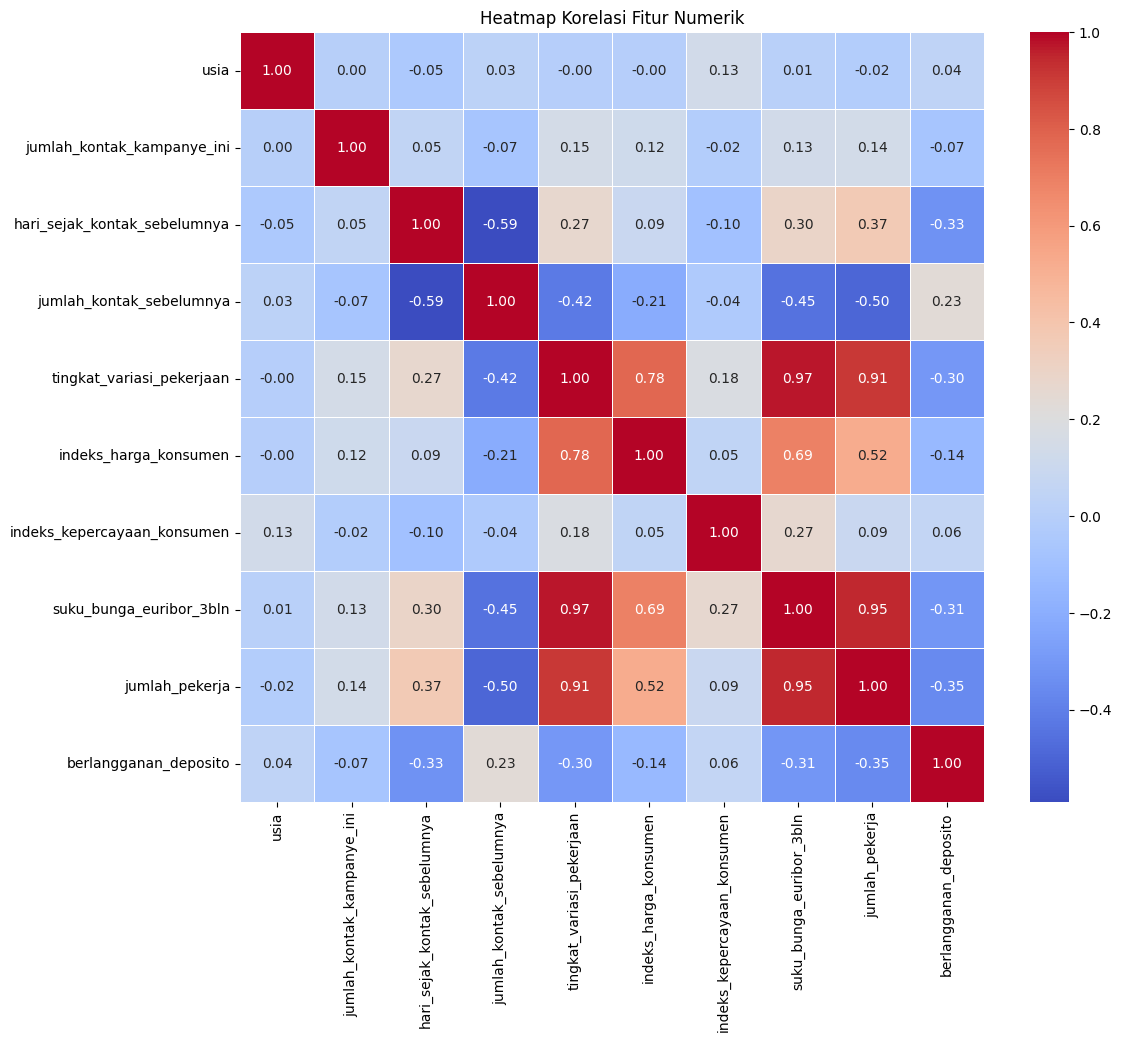

In [15]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

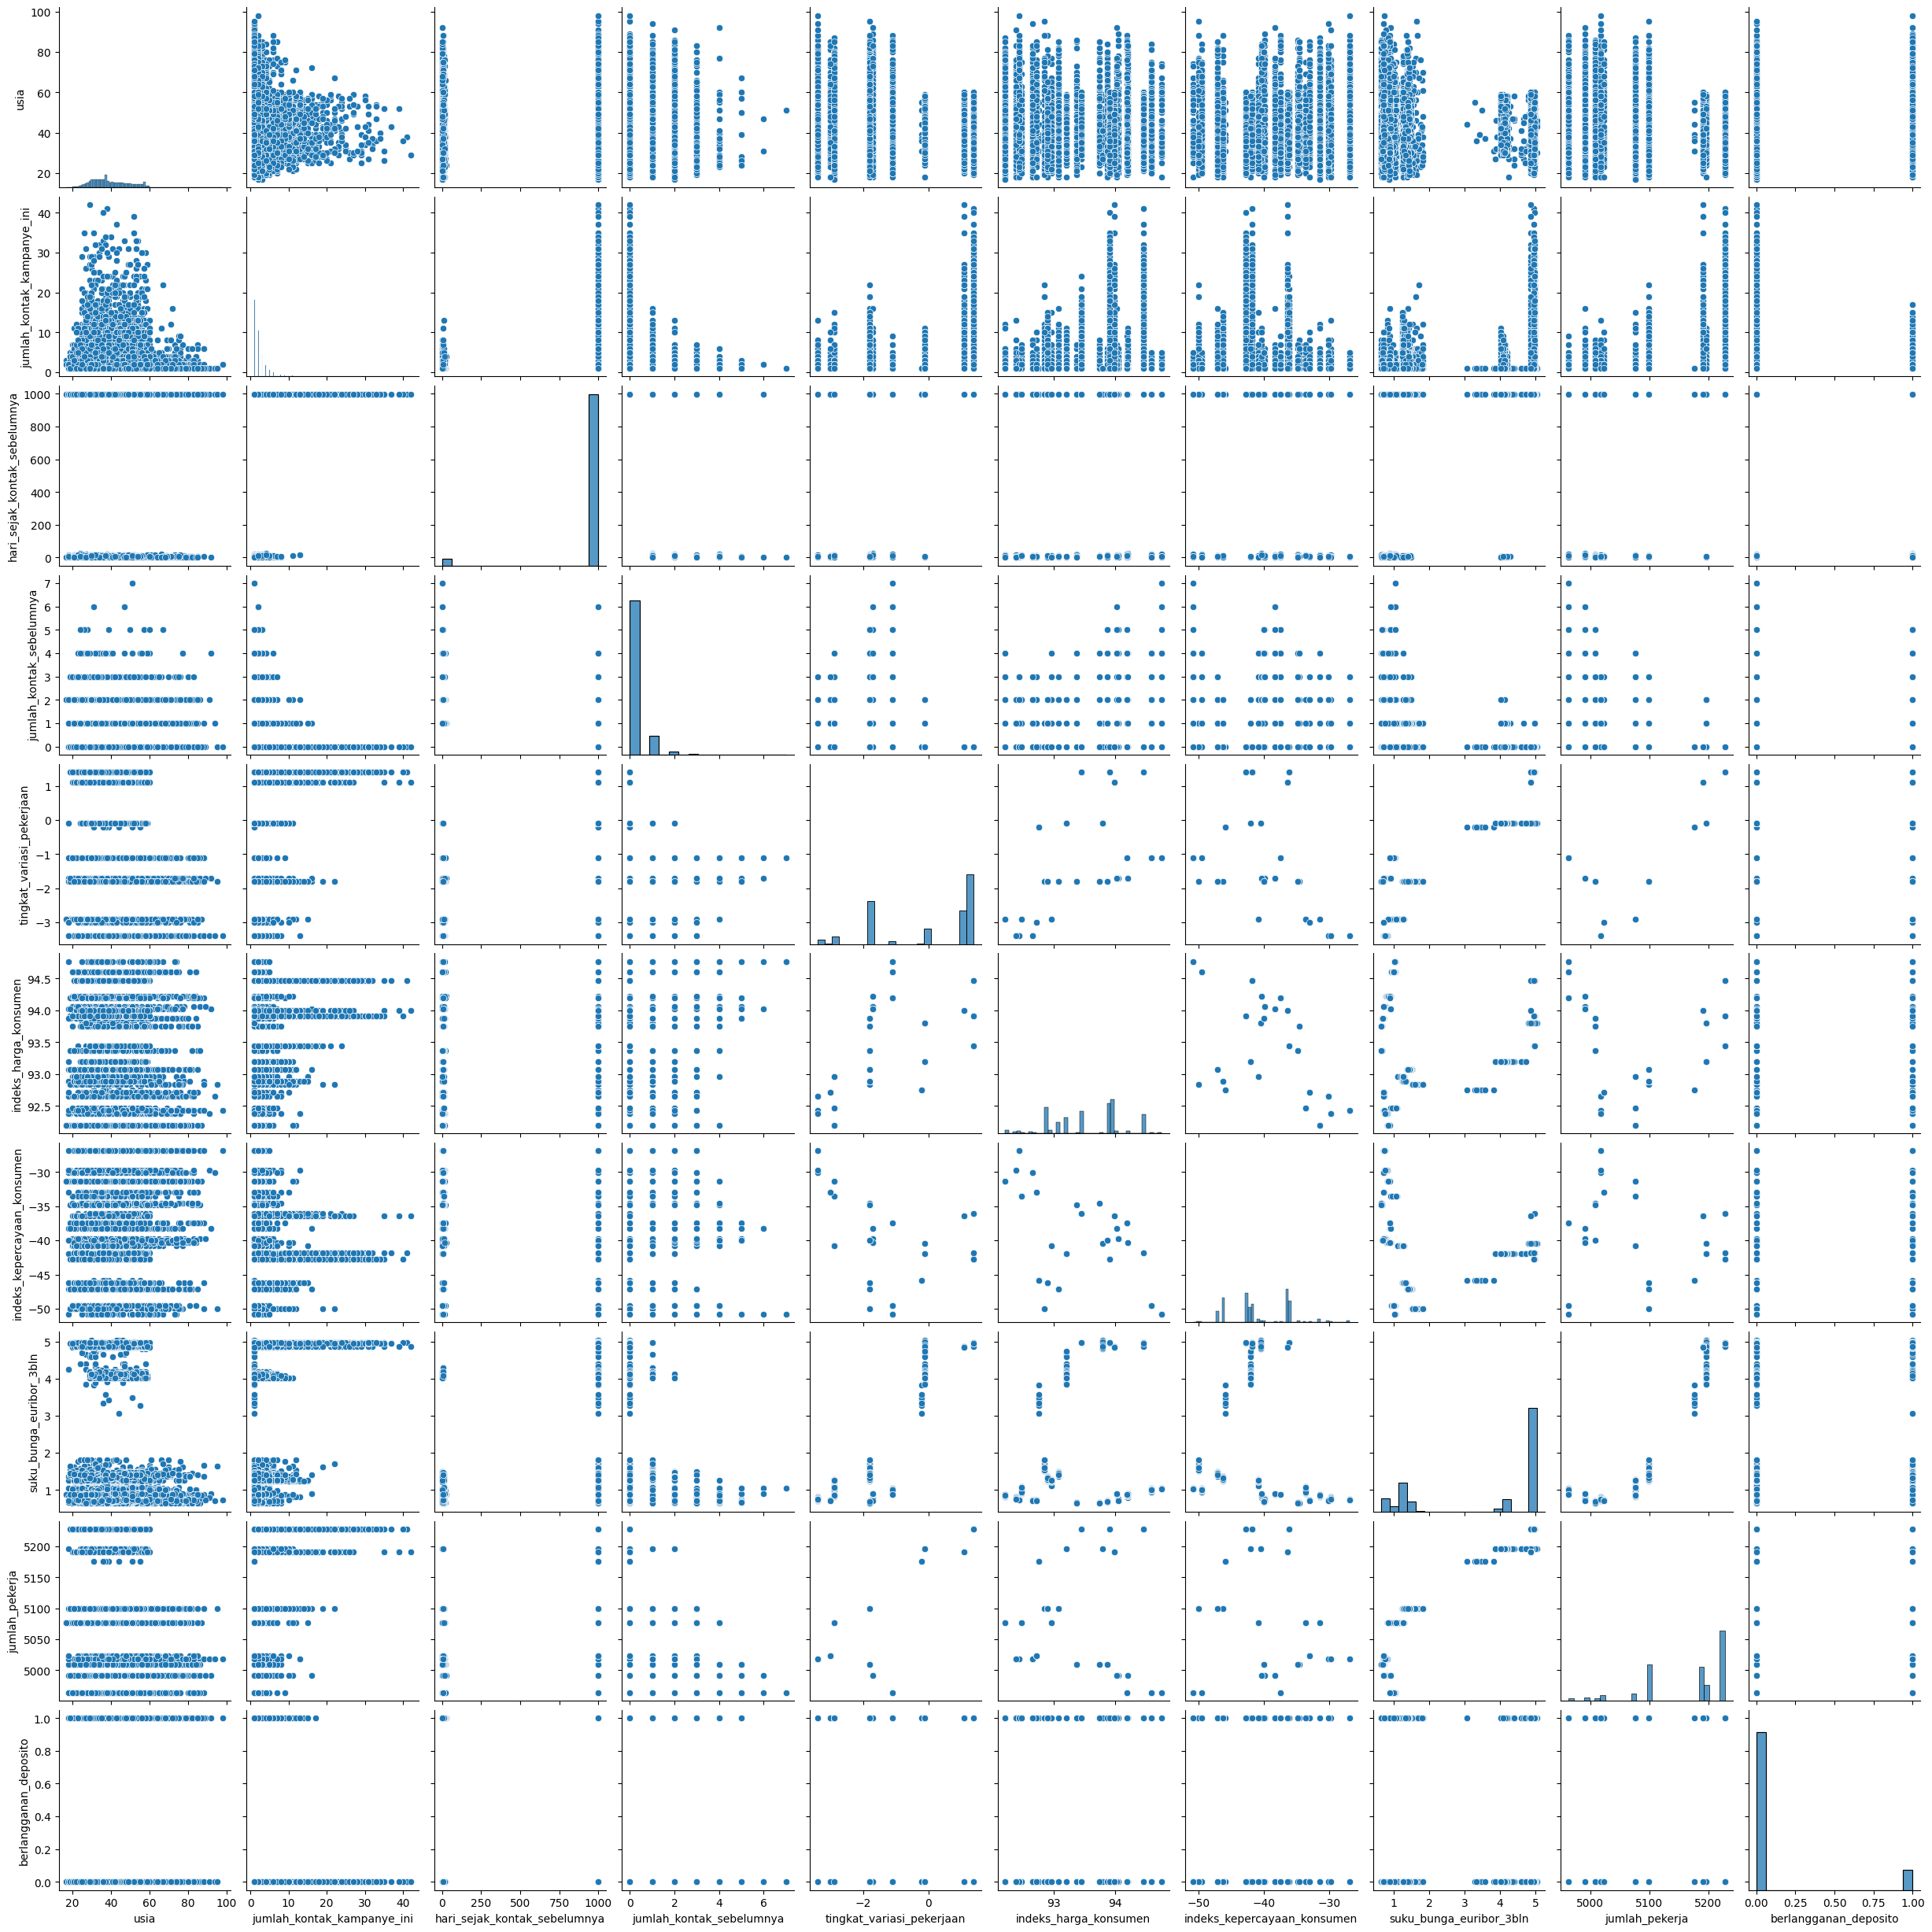

In [16]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

<ipython-input-17-3ee3ff7d5744>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='berlangganan_deposito', data=train, palette='viridis')


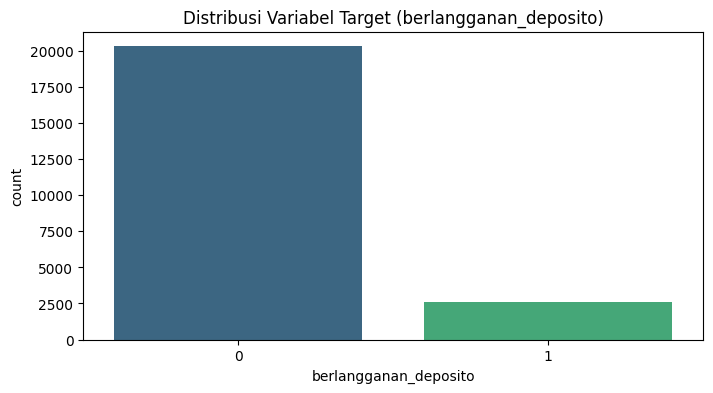

In [17]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='berlangganan_deposito', data=train, palette='viridis')
plt.title('Distribusi Variabel Target (berlangganan_deposito)')
plt.show()

In [18]:
# Mengindentifikasi baris duplikat
duplicates = train.duplicated()

print("Baris Duplikat: ")
print(train[duplicates])

Baris Duplikat: 
       usia               pekerjaan status_perkawinan         pendidikan  \
254      43           pekerja kasar           menikah                SMP   
564      38  sosial media specialis             cerai  Pendidikan Tinggi   
838      32                 teknisi            lajang  Pendidikan Tinggi   
1266     26           pekerja kasar           menikah                SMP   
2125     31                 teknisi           menikah            Diploma   
...     ...                     ...               ...                ...   
22791    30                 teknisi            lajang  Pendidikan Tinggi   
22810    26           pekerja kasar           menikah                SMP   
22829    22               mahasiswa            lajang                 SD   
22840    33  sosial media specialis           menikah  Pendidikan Tinggi   
22846    32  sosial media specialis            lajang  Pendidikan Tinggi   

      gagal_bayar_sebelumnya pinjaman_rumah pinjaman_pribadi jenis_kon

In [19]:
# Menghapus baris duplikat
train = train.drop_duplicates()

print("Dataframe setelah menghapus duplikat")
print(train)

Dataframe setelah menghapus duplikat
       usia               pekerjaan status_perkawinan         pendidikan  \
0        63  sosial media specialis           menikah  Pendidikan Tinggi   
1        43                 teknisi           menikah  Pendidikan Tinggi   
2        29  sosial media specialis            lajang  Pendidikan Tinggi   
3        40           pekerja kasar           menikah                SMA   
4        40  sosial media specialis            lajang  Pendidikan Tinggi   
...     ...                     ...               ...                ...   
22911    32                 teknisi           menikah            Diploma   
22912    30               mahasiswa            lajang            Diploma   
22913    29                 manajer            lajang                SMA   
22914    52            entrepreneur           menikah     Tidak Tamat SD   
22915    49           pekerja kasar           menikah     Tidak Tamat SD   

      gagal_bayar_sebelumnya pinjaman_rumah pinjam

In [20]:
# Mengindentifikasi baris duplikat
duplicates = train.duplicated()

print("Baris Duplikat: ")
print(train[duplicates])

Baris Duplikat: 
Empty DataFrame
Columns: [usia, pekerjaan, status_perkawinan, pendidikan, gagal_bayar_sebelumnya, pinjaman_rumah, pinjaman_pribadi, jenis_kontak, bulan_kontak_terakhir, hari_kontak_terakhir, jumlah_kontak_kampanye_ini, hari_sejak_kontak_sebelumnya, jumlah_kontak_sebelumnya, hasil_kampanye_sebelumnya, tingkat_variasi_pekerjaan, indeks_harga_konsumen, indeks_kepercayaan_konsumen, suku_bunga_euribor_3bln, jumlah_pekerja, berlangganan_deposito]
Index: []


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score


# Target dan fitur
X = train.drop(columns=['berlangganan_deposito'])
y = train['berlangganan_deposito']

# Encode fitur kategorikal dengan LabelEncoder
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Standarisasi numerik
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Pilih 10 fitur teratas berdasarkan korelasi dengan target
X['target'] = y
top_features = X.corr()['target'].abs().sort_values(ascending=False).iloc[1:11].index.tolist()
X = X.drop(columns='target')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.2, random_state=42, stratify=y)

# Latih model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model dengan 10 fitur terbaik:", round(accuracy * 100, 2), "%")


Akurasi model dengan 10 fitur terbaik: 89.5 %


In [22]:
X_train.shape

(17862, 10)

In [23]:
y_train

,berlangganan_deposito
10844,0
3250,0
6399,0
16753,0
20115,0
...,...
18422,0
11414,1
16632,0
17612,0


In [24]:
from math import gamma
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# --- Logistic Regression GridSearchCV ---
lr = LogisticRegression(max_iter=1000)
param_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(lr, param_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# --- Random Forest GridSearchCV ---
rf = RandomForestClassifier(random_state=42)
param_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# --- XGBoost ---
xgb = XGBClassifier( gamma=0,eval_metric='logloss', random_state=42)
param_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 5, 10]
    }
grid_xgb = GridSearchCV(xgb, param_xgb, cv=5, scoring='accuracy', n_jobs=1, verbose=1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# --- Evaluasi fungsi ---
def evaluate_model(name, y_true, y_pred, model=None):
    print(f"\n📊 Evaluasi Model: {name}")
    print("Akurasi     :", round(accuracy_score(y_true, y_pred) * 100, 2), "%")
    print("Precision   :", round(precision_score(y_true, y_pred) * 100, 2), "%")
    print("Recall      :", round(recall_score(y_true, y_pred) * 100, 2), "%")
    print("F1 Score    :", round(f1_score(y_true, y_pred) * 100, 2), "%")
    if model and hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        print("ROC AUC     :", round(roc_auc_score(y_true, y_prob) * 100, 2), "%")

# Tampilkan hasil
evaluate_model("Logistic Regression", y_test, y_pred_lr, best_lr)
evaluate_model("Random Forest", y_test, y_pred_rf, best_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb, best_xgb)

# Tampilkan hyperparameter terbaik
print("\n🔍 Best Params Logistic Regression:", grid_lr.best_params_)
print("🔍 Best Params Random Forest:", grid_rf.best_params_)
print("🔍 Best Params XGBoost:", grid_xgb.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

📊 Evaluasi Model: Logistic Regression
Akurasi     : 89.43 %
Precision   : 67.14 %
Recall      : 18.08 %
F1 Score    : 28.48 %
ROC AUC     : 77.75 %

📊 Evaluasi Model: Random Forest
Akurasi     : 89.36 %
Precision   : 61.08 %
Recall      : 23.85 %
F1 Score    : 34.3 %
ROC AUC     : 79.16 %

📊 Evaluasi Model: XGBoost
Akurasi     : 89.68 %
Precision   : 67.05 %
Recall      : 22.31 %
F1 Score    : 33.48 %
ROC AUC     : 78.93 %

🔍 Best Params Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
🔍 Best Params Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
🔍 Best Params XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0.01, 'reg_lambda': 1, 'subsample': 1.0}


Pada langkah ini, setiap model dievaluasi untuk mengukur kinerjanya. Fungsi *evaluate_model* digunakan untuk menghitung berbagai metrik performa, seperti matriks kebingungannya (confusion matrix), serta skor akurasi, presisi, recall, dan F1-Score.

In [25]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FN)': fn,
        'False Negative (FP)': fp,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilny
results = {
  lr: evaluate_model(best_lr, X_test, y_test),
  rf: evaluate_model(best_rf, X_test, y_test),
  xgb: evaluate_model(best_xgb, X_test, y_test)
}


# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                                               Model  Accuracy  Precision  \
0                  LogisticRegression(max_iter=1000)  0.894313   0.671429   
1            RandomForestClassifier(random_state=42)  0.893641   0.610837   
2  XGBClassifier(base_score=None, booster=None, c...  0.896776   0.670520   

     Recall  F1-Score  
0  0.180769  0.284848  
1  0.238462  0.343015  
2  0.223077  0.334776  


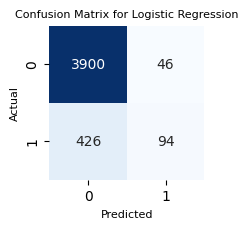

In [27]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

# Tampilkan Confusion Matrix untuk KNN
lr_cm = results[lr]['Confusion Matrix']
plot_confusion_matrix(lr_cm, 'Logistic Regression')

- True Positive (TP) = 94: Model berhasil mengidentifikasi 94 nasabah yang benar-benar membeli deposito dengan tepat.

- False Positive (FP) = 46: Model salah mengidentifikasi 46 nasabah yang sebenarnya tidak membeli deposito sebagai pembeli deposito.

- True Negative (TN) = 3900: Model benar mengidentifikasi nasabah yang tidak membeli deposito.

- False Negative (FN) = 426: Model gagal mengidentifikasi 426 nasabah yang sebenarnya membeli deposito.

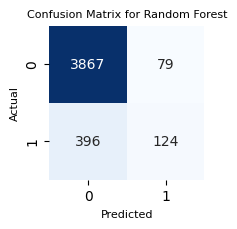

In [28]:
# Tampilkan Confusion Matrix untuk Random Forest

rf_cm = results[rf]['Confusion Matrix']
plot_confusion_matrix(rf_cm, 'Random Forest')

- True Positive (TP) = 124: Model mengidentifikasi 124 nasabah yang benar-benar membeli deposito.

- False Positive (FP) = 79: Model salah mengidentifikasi 79 nasabah yang tidak membeli deposito sebagai pembeli deposito.

- True Negative (TN) = 3867: Model mengidentifikasi dengan benar nasabah yang tidak membeli deposito.

- False Negative (FN) = 396: Model gagal mengidentifikasi 396 nasabah yang sebenarnya membeli deposito.

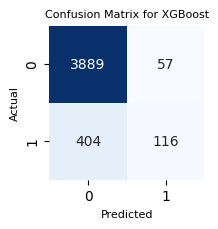

In [29]:
# Tampilkan Confusion Matrix untuk XGBoost
# Menggunakan objek model `xgb` sebagai kunci
xgb_cm = results[xgb]['Confusion Matrix']
plot_confusion_matrix(xgb_cm, 'XGBoost')

- True Positive (TP) = 114: Model berhasil mengidentifikasi 114 nasabah yang benar-benar membeli deposito.

- False Positive (FP) = 52: Model salah mengidentifikasi 54 nasabah yang sebenarnya tidak membeli deposito sebagai pembeli deposito.

- True Negative (TN) = 3892: Model benar mengidentifikasi nasabah yang tidak membeli deposito.

- False Negative (FN) = 406: Model gagal mengidentifikasi 367 nasabah yang sebenarnya membeli deposito.

In [33]:
# Simpan model
import joblib
joblib.dump(best_lr, 'logistic_regression_model.joblib')
joblib.dump(best_rf, 'random_forest_model.joblib')
joblib.dump(best_xgb, 'xgboost_model.joblib')

